In [1]:
%matplotlib inline

In [2]:
### import all the dependencies 
import requests
import csv
import json
import pandas as pd
import re
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import os
from palettable.colorbrewer.qualitative import Pastel1_7  # Inferno_4,Plasma_5,Viridis_6,Viridis_4 
import warnings
import configparser
warnings.filterwarnings('ignore')

In [3]:
## Define all variables 
configFile = "config.cfg"
config = configparser.ConfigParser()
config.read(configFile)

['config.cfg']

In [4]:
### Now we will read data form previously saved CSV
print("Starting to read from csv , data is huge so it may take few seconds")
main_customers_df = pd.read_csv("data/Main_customers.csv", low_memory=False)
print('Shape of exports read from CSV : {}'.format(main_customers_df.shape))

Starting to read from csv , data is huge so it may take few seconds
Shape of exports read from CSV : (711157, 35)


In [5]:
##List the names of columns 
customers_df=main_customers_df
customers_df.columns


Index(['Unnamed: 0', 'EventModDead', 'EventModError', 'EventModFrustrated',
       'EventStart', 'EventTargetSelectorTok', 'EventTargetText', 'EventType',
       'IndvId', 'PageActiveDuration', 'PageAgent', 'PageBrowser',
       'PageDevice', 'PageDuration', 'PageId', 'PageIp', 'PageLatLong',
       'PageNumErrors', 'PageNumInfos', 'PageNumWarnings',
       'PageOperatingSystem', 'PageRefererUrl', 'PageUrl', 'SessionId',
       'UserAppKey', 'UserDisplayName', 'UserEmail', 'UserId',
       'user_anonymousId_str', 'user_firstName_str', 'user_lastName_str',
       'user_serviceName_str', 'user_userHash_str', 'user_userId_str',
       'user_username_str'],
      dtype='object')

In [6]:
## Data Cleaning and filtering 
#dropping an Column not needed 
print('number of columns  before :{}'.format(len(customers_df.columns)))
customers_df.drop('Unnamed: 0', axis=1, inplace=True)
print('number of columns  After :{}'.format(len(customers_df.columns)))

number of columns  before :35
number of columns  After :34


In [7]:
## Need to Add a column as Domain 
print('Adding domain column')

customers_df['Domain'] = customers_df['UserEmail'].str.split(pat="@", expand=True)[1]
print('Shape of exports read from CSV : {}'.format(customers_df.shape))

Adding domain column
Shape of exports read from CSV : (711157, 35)


In [8]:
# drop rows that doesn't have an email
customers_df = customers_df.dropna(subset=['UserEmail'])

# remove all the rows that use internal email or not valid external customers  emails
#Read the info on emails fron config file 
dropemails= config.get('Emails', 'dropEmailList')
dropemailsList = dropemails.split(",")
external_customers_df = customers_df[~ customers_df.Domain.isin(dropemailsList)]

print('Shape of dataframe after dropping internal users : {}'.format(external_customers_df.shape))

Shape of dataframe after dropping internal users : (552240, 35)


In [9]:
## Dropping unwanted columns 
external_customers_df = external_customers_df[['Domain','UserAppKey','user_serviceName_str','UserId','IndvId','SessionId',
                                       'PageUrl','PageRefererUrl','PageBrowser','PageDevice','PageDuration','PageActiveDuration',
                                        'PageLatLong',
                                       'EventStart','EventType']]
print('Shape of dataframe after dropping extra columns: {}'.format(external_customers_df.shape))  

Shape of dataframe after dropping extra columns: (552240, 15)


In [10]:
##Renaming columns
external_customers_df.rename(columns={'UserAppKey':'UserEmail','user_serviceName_str':'serviceName'},inplace = True)
external_customers_df.columns

Index(['Domain', 'UserEmail', 'serviceName', 'UserId', 'IndvId', 'SessionId',
       'PageUrl', 'PageRefererUrl', 'PageBrowser', 'PageDevice',
       'PageDuration', 'PageActiveDuration', 'PageLatLong', 'EventStart',
       'EventType'],
      dtype='object')

In [11]:
## Printing list of unique services we have collected data for 
list(external_customers_df.serviceName.unique())

['Data Logging', 'SDK', 'Data Package']

In [15]:
#Masking Company Names 
domainList  = list(external_customers_df.Domain.unique())
counter = 1
for domain in domainList  :
    newDomain = "Company" + str(counter)+".com"
    print(newDomain)
    external_customers_df.replace(domain,newDomain,inplace =True,regex=True)
    counter=counter +1  

print("Masking done")

Company1.com
Company2.com
Company3.com
Company4.com
Company5.com
Company6.com
Company7.com
Company8.com
Company9.com
Company10.com
Company11.com
Company12.com
Company13.com
Company14.com
Company15.com
Company16.com
Company17.com
Company18.com
Company19.com
Company20.com
Company21.com
Company22.com
Company23.com
Company24.com
Company25.com
Company26.com
Company27.com
Company28.com
Company29.com
Company30.com
Company31.com
Company32.com
Company33.com
Company34.com
Company35.com
Company36.com
Company37.com
Company38.com
Company39.com
Company40.com
Company41.com
Company42.com
Company43.com
Company44.com
Company45.com
Company46.com
Company47.com
Company48.com
Company49.com
Company50.com
Company51.com
Company52.com
Company53.com
Company54.com
Company55.com
Company56.com
Company57.com
Company58.com
Company59.com
Company60.com
Company61.com
Company62.com
Company63.com
Company64.com
Company65.com
Company66.com
Company67.com
Company68.com
Company69.com
Company70.com
Company71.com
Company72.com
C

In [12]:
### Writing  masked /filtered and clean data to CSV ,from here always read the local file names external_customers.csv
external_customers_df.to_csv("data/external_customers.csv")
print("external Customer data  Successfully written to external_customers.csv ")

external Customer data  Successfully written to external_customers.csv 


In [14]:
### Main Program starts here  - Now we can read data from existing saved files or run the progran from begining 

external_customers_df = pd.read_csv("data/external_customers.csv", low_memory=False)
print('Shape of exports read from CSV : {}'.format(external_customers_df.shape))

Shape of exports read from CSV : (552240, 16)


In [15]:
##List the names of columns 
external_customers_df.columns


Index(['Unnamed: 0', 'Domain', 'UserEmail', 'serviceName', 'UserId', 'IndvId',
       'SessionId', 'PageUrl', 'PageRefererUrl', 'PageBrowser', 'PageDevice',
       'PageDuration', 'PageActiveDuration', 'PageLatLong', 'EventStart',
       'EventType'],
      dtype='object')

In [16]:
len(external_customers_df.columns)

16

In [17]:
## Data Cleaning and filtering 
#dropping an Column not needed 
print('Number of columns before :{}'.format(len(external_customers_df.columns)))
external_customers_df.drop('Unnamed: 0', axis=1, inplace=True)
print('Number of columns after :{}'.format(len(external_customers_df.columns)))

Number of columns before :16
Number of columns after :15


In [18]:
external_customers_df.head()   


,Domain,UserEmail,serviceName,UserId,IndvId,SessionId,PageUrl,PageRefererUrl,PageBrowser,PageDevice,PageDuration,PageActiveDuration,PageLatLong,EventStart,EventType
0,dataguru.com,praphullk@dataguru.com,Data Logging,5706135820566528,5737988004773888,5629499534213120,https://www.cloud.dataguru.com/li/search/explo...,https://console.cloud.dataguru.com/bin/gateway...,Chrome,Desktop,1308897,282025,"37.3697,-122.0214",2018-09-08T00:00:00.518Z,click
1,dataguru.com,praphullk@dataguru.com,Data Logging,5706135820566528,5737988004773888,5629499534213120,https://www.cloud.dataguru.com/li/search/explo...,https://console.cloud.dataguru.com/bin/gateway...,Chrome,Desktop,1308897,282025,"37.3697,-122.0214",2018-09-08T00:00:02.859Z,click
2,dataguru.com,praphullk@dataguru.com,Data Logging,5706135820566528,5737988004773888,5629499534213120,https://www.cloud.dataguru.com/li/search/explo...,https://console.cloud.dataguru.com/bin/gateway...,Chrome,Desktop,1308897,282025,"37.3697,-122.0214",2018-09-08T00:00:02.930Z,navigate
3,dataguru.com,praphullk@dataguru.com,Data Logging,5706135820566528,5737988004773888,5629499534213120,https://www.cloud.dataguru.com/li/search/explo...,https://console.cloud.dataguru.com/bin/gateway...,Chrome,Desktop,1308897,282025,"37.3697,-122.0214",2018-09-08T00:00:03.078Z,change
4,dataguru.com,praphullk@dataguru.com,Data Logging,5706135820566528,5737988004773888,5629499534213120,https://www.cloud.dataguru.com/li/search/explo...,https://console.cloud.dataguru.com/bin/gateway...,Chrome,Desktop,1308897,282025,"37.3697,-122.0214",2018-09-08T00:01:08.469Z,click


In [25]:
#Adding a new column for PageURL to make it normalized
external_customers_df['PageUrl_Norm'] = external_customers_df['PageUrl'].apply(lambda x: "/".join(x.split("/")[3:7]))
external_customers_df.PageUrl_Norm.value_counts()

dataType-UI/#/blueprint-ui;ash=/blueprint                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [26]:
#### Now We need to answer active users or company by unique  session ID count 
df_groupby_session = external_customers_df.groupby(["Domain",'UserEmail'])['UserId'].nunique()
df_groupby_session.head(20)

Domain         UserEmail                      
Company1.com   chad.tew@Company1.com               3
Company10.com  james.knueven@Company10.com        10
               jaroslaw.gajewski@Company10.com     5
               konrad.clapa@Company10.com         15
               robert.nieman@Company10.com        18
Company11.com  joshua.broadway@Company11.com       3
Company12.com  zach.milleson@Company12.com        12
Company13.com  abdul.kazmi@Company13.com           2
               michael.phillips@Company13.com      1
Company14.com  akardell@Company14.com             31
               bmiller@Company14.com               1
               dcoulter@Company14.com              1
               gthompson@Company14.com             1
               rbennett@Company14.com              1
               rmiller@Company14.com               1
               tperry@Company14.com                5
Company15.com  asmith1@Company15.com               4
               bianca1@Company15.com               1

In [27]:

# Setting data for Company session count
df_groupby_session = external_customers_df.groupby(["Domain"])['UserId'].nunique()
df_groupby_session= df_groupby_session.sort_values(ascending=False)
company_bysession_df = df_groupby_session.reset_index(['Domain'])
company_bysession_df = company_bysession_df.rename(columns={"UserId": "SessionCount"})
company_bysession_df_saved = company_bysession_df
company_bysession_df = company_bysession_df[company_bysession_df['SessionCount']>2]


In [28]:
## Top 15 Active Cutomers By Session count 
company_bysession_df = company_bysession_df.head(15)
company_bysession_df

,Domain,SessionCount
0,Company43.com,57
1,Company10.com,48
2,Company9.com,42
3,Company14.com,41
4,Company24.com,38
5,Company27.com,35
6,Company46.com,31
7,Company22.com,29
8,Company8.com,22
9,Company36.com,22


In [29]:
# # create imgs directory if needed
if not os.path.isdir('../imgs'):
    os.makedirs('../imgs')

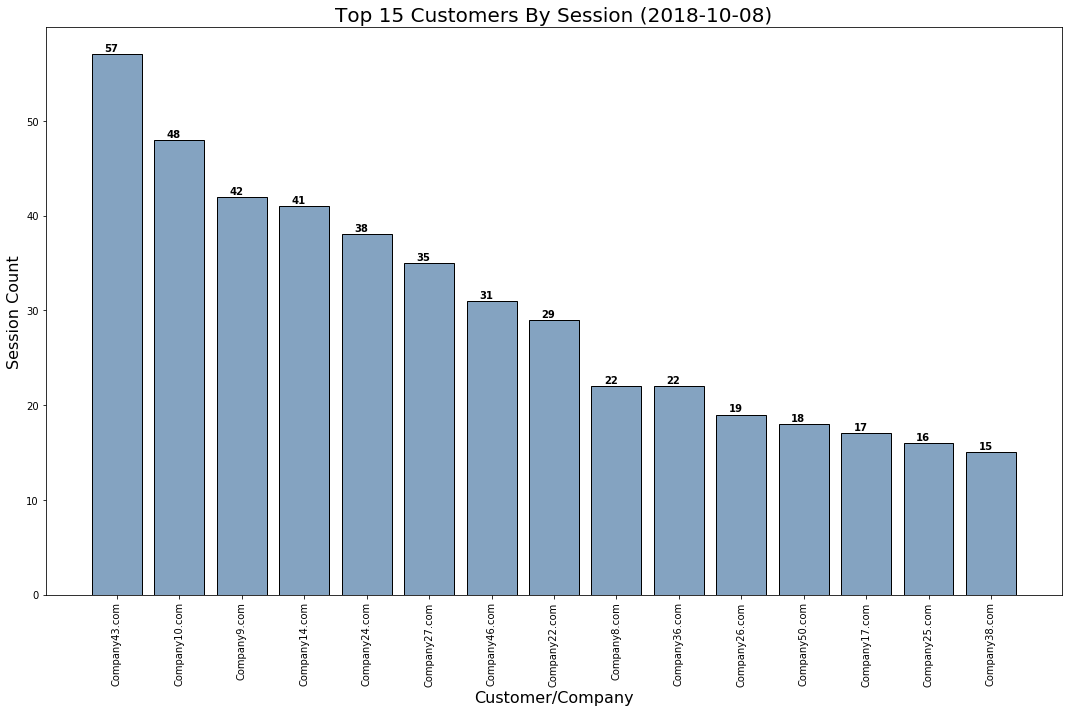

In [30]:

# Visually answering Top 15 Customers by Session Count

# Plotting the graph
plt.figure(figsize=(15,10))
y_pos = np.arange(len(company_bysession_df["Domain"]))
plt.bar(y_pos, company_bysession_df["SessionCount"], color=(0.2, 0.4, 0.6, 0.6), edgecolor = 'black' )
plt.xticks(y_pos, company_bysession_df["Domain"], rotation='vertical')
# Setting value label for each bar
for i, v in enumerate(company_bysession_df["SessionCount"]):
    plt.text(i-.20, v+.30, v, color='black', fontweight='bold')
# Setting title, grid and X and Y axis labels
plt.xlabel("Customer/Company",fontsize=16)
plt.ylabel("Session Count", fontsize=16)
plt.title(f'Top 15 Customers By Session ({datetime.now().date()})', fontsize=20)
plt.tight_layout()
# Save Figure
plt.savefig("../imgs/Top15CustomerBySession.png",bbox_inches='tight')
plt.show()


In [31]:
# Average Session Time Per Company
external_customers_df["PageInactiveTime"] = external_customers_df['PageDuration']- external_customers_df['PageActiveDuration']
session_info_df = external_customers_df[['Domain', 'UserEmail', 'UserId', 'PageDuration', 'PageActiveDuration',"PageInactiveTime" , 'PageUrl']]

session_info_df = session_info_df.groupby(["Domain","UserEmail", "UserId"]).head(1).reset_index(drop=True)
session_info_df = session_info_df.sort_values(["Domain","UserEmail", "UserId"])
session_info_df.head(5)

,Domain,UserEmail,UserId,PageDuration,PageActiveDuration,PageInactiveTime,PageUrl
119,Company1.com,chad.tew@Company1.com,5099875769253888,35621,30044,5577,https://www.cloud.dataguru.com/li/search
0,Company1.com,chad.tew@Company1.com,5650932471693312,20030,3459,16571,https://www.cloud.dataguru.com/li/
54,Company1.com,chad.tew@Company1.com,5745257553592320,52610,43520,9090,https://www.cloud.dataguru.com/li/
221,Company10.com,james.knueven@Company10.com,5070754280374272,4889492,196689,4692803,https://www.cloud.dataguru.com/dataType-UI/?or...
435,Company10.com,james.knueven@Company10.com,5076154207698944,1501676,4867,1496809,https://www.cloud.dataguru.com/dataType-UI/#/d...


In [32]:
# Get average session time per Company in seconds
session_info_df = session_info_df.groupby(["Domain"])
avg_session_info_df = session_info_df['PageDuration','PageActiveDuration',"PageInactiveTime"].mean()
avg_session_info_df = avg_session_info_df.rename(columns={
                       'PageDuration': 'AverageSessionTime (Mins)',
                       'PageActiveDuration': 'AverageActiveSessionTime (Mins)',
                        'PageInactiveTime':'AverageInActiveSessionTime (Mins)'})
avg_session_info_df.head(10)

,AverageSessionTime (Mins),AverageActiveSessionTime (Mins),AverageInActiveSessionTime (Mins)
Domain,,,
Company1.com,3.608700e+04,25674.333333,1.041267e+04
Company10.com,2.291941e+06,177536.083333,2.114405e+06
Company11.com,8.223473e+05,187558.333333,6.347890e+05
Company12.com,3.062218e+06,402044.666667,2.660174e+06
Company13.com,2.090006e+06,45316.666667,2.044690e+06
Company14.com,1.291854e+06,181686.853659,1.110167e+06
Company15.com,6.562460e+05,24982.200000,6.312638e+05
Company16.com,9.093740e+04,37906.200000,5.303120e+04
Company17.com,2.708888e+06,431162.588235,2.277726e+06


In [33]:
### Trying to add more columns for calculation speciall ideal time 
company_session_merge_df = pd.merge(company_bysession_df, avg_session_info_df, on="Domain",how ="left")
company_session_merge_df.head(10)

,Domain,SessionCount,AverageSessionTime (Mins),AverageActiveSessionTime (Mins),AverageInActiveSessionTime (Mins)
0,Company43.com,57,7.438626e+06,219182.719298,7.219443e+06
1,Company10.com,48,2.291941e+06,177536.083333,2.114405e+06
2,Company9.com,42,1.168684e+06,218631.404762,9.500529e+05
3,Company14.com,41,1.291854e+06,181686.853659,1.110167e+06
4,Company24.com,38,3.388779e+06,402912.842105,2.985866e+06
5,Company27.com,35,1.571201e+06,207425.514286,1.363775e+06
6,Company46.com,31,9.889472e+05,116545.032258,8.724022e+05
7,Company22.com,29,2.326947e+06,373954.793103,1.952993e+06
8,Company8.com,22,2.226720e+06,415543.727273,1.811176e+06
9,Company36.com,22,1.377183e+06,197441.409091,1.179742e+06


In [34]:


company_session_merge_df["SessionCount_Rank"]= company_session_merge_df["SessionCount"].rank(method='dense')
company_session_merge_df["AverageSessionTime_Rank"]= company_session_merge_df["AverageSessionTime (Mins)"].rank(method='dense')
company_session_merge_df["AverageActiveSessionTime"]= company_session_merge_df["AverageActiveSessionTime (Mins)"].rank(method='dense')
company_session_merge_df["AvgInactive_Rank"] = company_session_merge_df['AverageInActiveSessionTime (Mins)'].rank(method='dense')

weight_Col1=company_session_merge_df["SessionCount_Rank"]
weight_Col2=company_session_merge_df["AverageSessionTime_Rank"]
weight_Col3=company_session_merge_df["AverageActiveSessionTime"]
weight_Col4=company_session_merge_df["AvgInactive_Rank"]

company_session_merge_df["ActiveCustomer_score"]= ((weight_Col1*0.6 + weight_Col2*0.2+
                                                    weight_Col3*0.5 - weight_Col4*0.3)).rank(method='min')

company_session_merge_df.sort_values("ActiveCustomer_score", ascending=False,inplace =True)

        
        
customer_rank_df= company_session_merge_df[['Domain', 'SessionCount', 'AverageSessionTime (Mins)',
      'AverageActiveSessionTime (Mins)', 'AverageInActiveSessionTime (Mins)','ActiveCustomer_score']]

customer_rank_df['AverageSessionTime (Mins)'] = round(customer_rank_df['AverageSessionTime (Mins)']/1000/60 ,2)
customer_rank_df['AverageActiveSessionTime (Mins)'] = round(customer_rank_df['AverageActiveSessionTime (Mins)']/1000/60 ,2)
customer_rank_df['AverageInActiveSessionTime (Mins)'] = round(customer_rank_df['AverageInActiveSessionTime (Mins)']/1000/60 ,2)



customer_rank_df.reset_index(drop=True,inplace = True)

customer_rank_df["customer_Rank"] =customer_rank_df.index
customer_rank_df["customer_Rank"] = customer_rank_df["customer_Rank"].apply(lambda x: x + 1)
 

top_15_customer_rank = customer_rank_df.head(15)
top_15_customer_rank

,Domain,SessionCount,AverageSessionTime (Mins),AverageActiveSessionTime (Mins),AverageInActiveSessionTime (Mins),ActiveCustomer_score,customer_Rank
0,Company43.com,57,123.98,3.65,120.32,15.0,1
1,Company9.com,42,19.48,3.64,15.83,14.0,2
2,Company24.com,38,56.48,6.72,49.76,13.0,3
3,Company14.com,41,21.53,3.03,18.50,12.0,4
4,Company8.com,22,37.11,6.93,30.19,11.0,5
5,Company10.com,48,38.20,2.96,35.24,10.0,6
6,Company22.com,29,38.78,6.23,32.55,9.0,7
7,Company27.com,35,26.19,3.46,22.73,8.0,8
8,Company17.com,17,45.15,7.19,37.96,7.0,9
9,Company36.com,22,22.95,3.29,19.66,6.0,10


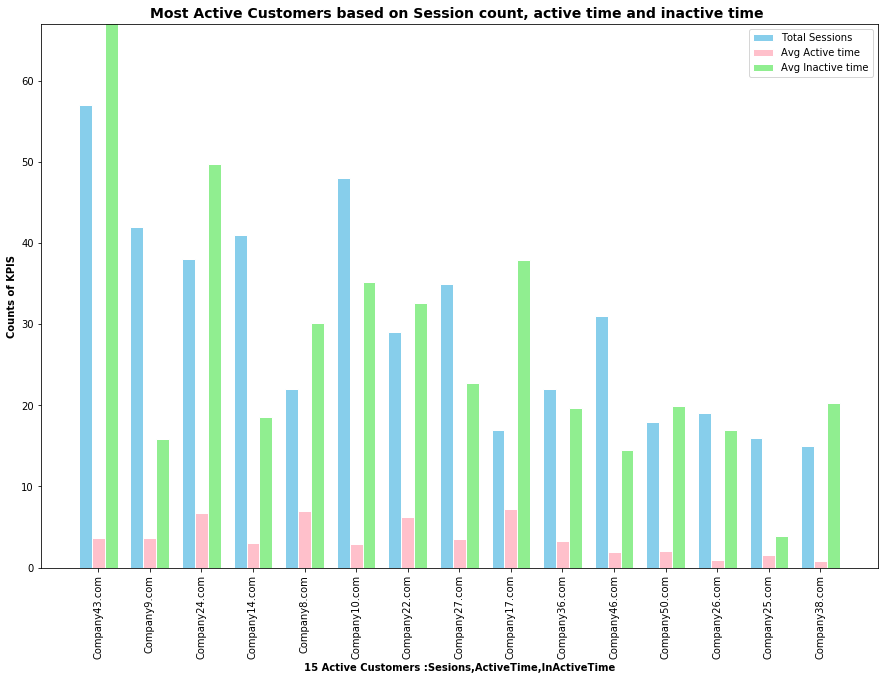

In [35]:
###AS working on stacked bar include 

plt.figure(figsize= (15,10))
sessionCount = top_15_customer_rank["SessionCount"]
avg_active = top_15_customer_rank["AverageActiveSessionTime (Mins)"]
avg_inactive= top_15_customer_rank["AverageInActiveSessionTime (Mins)"]
companies  = top_15_customer_rank["Domain"]
# set width of bar
barWidth = 0.25

# Set position of bar on X axis
r1 = np.arange(len(sessionCount))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Make the plot
plt.bar(r1, sessionCount, color='skyblue', width=barWidth, edgecolor='white', label='Total Sessions')
plt.bar(r2,avg_active, color='pink', width=barWidth, edgecolor='white', label='Avg Active time')
plt.bar(r3, avg_inactive, color='lightgreen', width=barWidth, edgecolor='white', label='Avg Inactive time')

# Add xticks on the middle of the group bars
plt.xlabel('15 Active Customers :Sesions,ActiveTime,InActiveTime', fontweight='bold')
plt.ylabel('Counts of KPIS',fontweight='bold')
plt.xticks([r + barWidth for r in range(len(sessionCount))], companies,rotation='vertical')
# Create legend & Show graphic

plt.title("Most Active Customers based on Session count, active time and inactive time ",fontsize =14,fontweight='bold')

ymax = sessionCount.max()

plt.ylim(0,ymax +10)
plt.legend()
# Save Figure
plt.savefig("../imgs/Top15CustomerByKPIS.png",bbox_inches='tight')
plt.show()

In [36]:
### Now we want to see top used Services overall
# Setting data for most used services
most_used_services_df = external_customers_df.groupby(["serviceName"])["PageUrl"].count()
most_used_services_df = most_used_services_df.reset_index(['serviceName'])
most_used_services_df = most_used_services_df.rename(columns={"PageUrl": "PageUrlCount"})
most_used_services_df

,serviceName,PageUrlCount
0,Data Logging,4381
1,Data Package,61864
2,SDK,12052


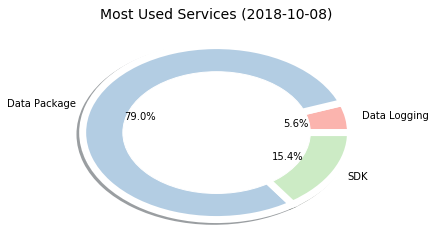

In [37]:


# Visually answering Most Used Services

# Plotting the graph
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(most_used_services_df["PageUrlCount"], labels=most_used_services_df["serviceName"], wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' }, colors=Pastel1_7.hex_colors, autopct="%1.1f%%", shadow=True)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title(f'Most Used Services ({datetime.now().date()})', fontsize=14)

# Save Figure
plt.savefig("../imgs/MostUsedServices.png",bbox_inches='tight')
plt.show()

In [38]:

## Now we need to answer Most Popular Service among our Active Customers
# Setting up data for Most Popuylar Service among our Active Customers

company_byservice_df = external_customers_df.groupby(["Domain", "serviceName"])["PageUrl"].count()
company_byservice_df = company_byservice_df.reset_index()
company_byservice_df = company_byservice_df.rename(columns={"PageUrl": "PageCount"})

DomainList = []
DomainList= top_15_customer_rank.Domain   

company_byservice_df = company_byservice_df[company_byservice_df.Domain.isin(DomainList)]


company_byservice_df

,Domain,serviceName,PageCount
1,Company10.com,Data Package,4395
2,Company10.com,SDK,188
7,Company14.com,Data Package,3611
8,Company14.com,SDK,34
12,Company17.com,Data Package,4400
13,Company17.com,SDK,459
24,Company22.com,Data Package,5539
25,Company22.com,SDK,2094
28,Company24.com,Data Logging,149
29,Company24.com,Data Package,9487


In [39]:
### Setting data in pivot for graphs

pivot_df = company_byservice_df.pivot(index ="Domain",columns = "serviceName",values = "PageCount")

pivot_df.fillna(0, inplace=True)
pivot_df

serviceName,Data Logging,Data Package,SDK
Domain,,,
Company10.com,0.0,4395.0,188.0
Company14.com,0.0,3611.0,34.0
Company17.com,0.0,4400.0,459.0
Company22.com,0.0,5539.0,2094.0
Company24.com,149.0,9487.0,1766.0
Company25.com,414.0,0.0,0.0
Company26.com,0.0,707.0,110.0
Company27.com,0.0,2449.0,1004.0
Company36.com,24.0,2682.0,274.0


<Figure size 1080x1440 with 0 Axes>

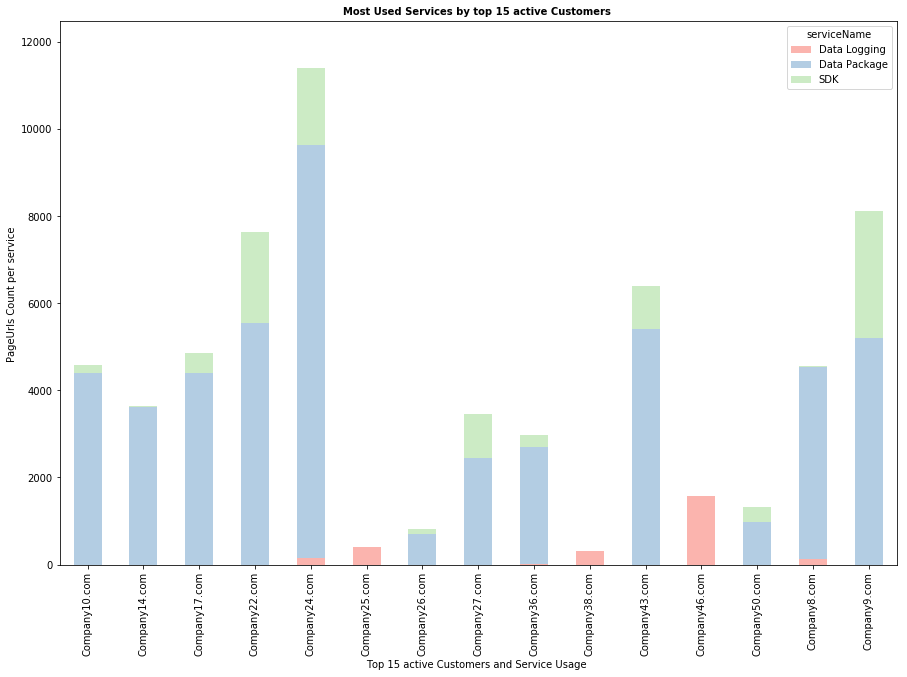

In [40]:
## Creating stacked graph

plt.figure(figsize= (15,20))
pivot_df.plot.bar(stacked=True,colors=Pastel1_7.hex_colors,figsize=(15,10))
plt.xlabel("Top 15 active Customers and Service Usage ")
plt.ylabel("PageUrls Count per service ")
plt.title("Most Used Services by top 15 active Customers ",fontsize =10,fontweight='bold')
plt.ylim(0,pivot_df["Data Package"].max() +3000)
# # Save Figure
plt.savefig("../imgs/Top15Customer_ServiceUsage.png",bbox_inches='tight')
plt.show()

In [41]:
## Now we need to answer Most Popular Browsers with our customers 
# Checking the types of Browsers used by customers
Popular_Browser_df = external_customers_df["PageBrowser"].unique()  
# Setting data for Most Popular Browsers 
Popular_Browser_df = external_customers_df.groupby(["PageBrowser"])["Domain"].count()
Popular_Browser_df = Popular_Browser_df.sort_values(ascending=False)
Popular_Browser_df = Popular_Browser_df.reset_index()
Popular_Browser_df = Popular_Browser_df.rename(columns={"Domain": "UserCount"})
Popular_Browser_df

,PageBrowser,UserCount
0,Chrome,71310
1,Firefox,3385
2,Safari,2993
3,Microsoft Edge,531
4,Internet Explorer,78


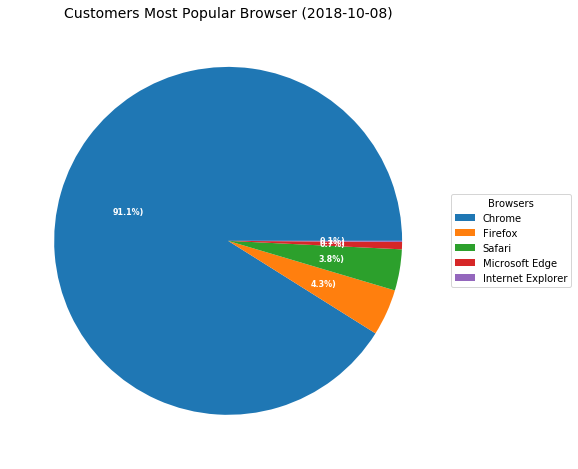

In [42]:
# Visually answering Most Popular Browser with our customers

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(aspect="equal"))
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%)".format(pct, absolute)
wedges, texts, autotexts = ax.pie(Popular_Browser_df["UserCount"], autopct=lambda pct: func(pct, Popular_Browser_df["UserCount"]),
                                  textprops=dict(color="w"))
ax.legend(wedges, Popular_Browser_df["PageBrowser"],
          title="Browsers",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8, weight="bold")
plt.title(f'Customers Most Popular Browser ({datetime.now().date()})', fontsize=14)

# Save figure
plt.savefig("../imgs/MostPopularBrowserPie.png",bbox_inches='tight')
plt.show()

In [43]:
## Now we need to answer Most Popular Devices used by our customers 
# Setting data for Most Popular Devices 
Popular_Device_df=external_customers_df["PageDevice"].unique()
Popular_Device_df = external_customers_df.groupby(["PageDevice"])["Domain"].count()
Popular_Device_df = Popular_Device_df.sort_values(ascending=False)
Popular_Device_df = Popular_Device_df.reset_index()
Popular_Device_df = Popular_Device_df.rename(columns={"Domain": "UserCount"})
Popular_Device_df

,PageDevice,UserCount
0,Desktop,78223
1,Mobile,49
2,Tablet,25


###Observation -  This is quite obvious that most of the users are using Desktop to use our servcies .

In [44]:
### Now we are answering Page Analysis 

page_counts_df = external_customers_df.groupby(["PageUrl_Norm"])["PageUrl"].count().sort_values(ascending=False)
page_counts_df  = pd.DataFrame(page_counts_df ).rename(columns={"PageUrl": "PageCount"})
top_10_urls = page_counts_df.head(10)

top_10_urls.reset_index(inplace = True)
top_10_urls


,PageUrl_Norm,PageCount
0,dataType-UI/#/blueprint-ui;ash=/blueprint,13494
1,dataType-UI/#/data-provision-ui;ash=/endpoints,4725
2,dataType-UI/#/dataType-ui;ash=/dataType,3686
3,dataType-UI/#/data-provision-ui;ash=/networkPr...,3581
4,dataType-UI/#/data-provision-ui;ash=/cloudZones,3486
5,dataType-UI/#/data-provision-ui;ash=/projects,3201
6,dataType-UI/#/data-provision-ui;ash=/quickstart,3108
7,dataType-UI/#/blueprint-ui;ash=/blueprints,2904
8,catalog/#/administration/contentSources,2689
9,catalog/#/administration/content,2466


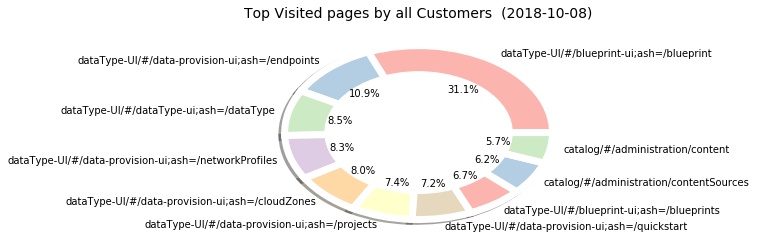

In [45]:
# Visually answering number of events per PageURL

# Plotting the graph
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(top_10_urls["PageCount"], labels=top_10_urls["PageUrl_Norm"], wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' }, colors=Pastel1_7.hex_colors, autopct="%1.1f%%", shadow=True)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title(f'Top Visited pages by all Customers  ({datetime.now().date()})', fontsize=14)

# Save Figure
plt.savefig("../imgs/TopVisitedPages_Overall.png",bbox_inches='tight')
plt.show()

In [46]:
### Top Visted pages by our top 15 active customers
top3_customer = customer_rank_df.head(3)
domain_list = top3_customer.Domain

# Get top 10 visited pageURLs for each domain in the domain list
customer_pages = external_customers_df.groupby(["Domain", "PageUrl_Norm"]).count()["PageUrl"]
customer_pages =customer_pages.reset_index()
customer_pages.rename(columns = {"PageUrl": "PageCount"}, inplace = True)

comp_dfs = []
max_count = 0

for company in domain_list:
   comp_df = customer_pages[customer_pages["Domain"] == company]
   comp_df = comp_df.sort_values("PageCount",ascending = False).head(10)
   comp_df.sort_values(by="PageCount", inplace = True)
   comp_df.reset_index(drop=True,inplace = True)
   comp_dfs.append(comp_df)

   maxct = comp_df["PageCount"].max()
   max_count = maxct if maxct > max_count else max_count


In [47]:

# Get the company name from the list: comp_dfs
def get_company(comp_df):
   return comp_df["Domain"].unique()[0].split('.')[0] 

In [48]:
# Function to plot the horizen bar chart for the Top 10 Visted Pages by company
def plot_top10_urls(domain_df):

    company = get_company(comp_df)

    plt.tight_layout()
    plt.figure(figsize= (10, 5))

    page_count = comp_df["PageCount"]
    urls = comp_df["PageUrl_Norm"]

    plt.barh(urls, page_count, align='center', alpha=0.5)

    for i, v in enumerate(page_count):
        plt.text(v, i - 0.2, str(v), color='blue', fontsize = 11)

   plt.xlabel('Page Visits Count', fontsize = 12)
   plt.ylabel('Page URLs',  fontsize = 12)
   plt.title(f"{company} :: Top 10 Pages Visited", fontsize =13, fontweight='bold')

   # Save Figure
   plt.savefig(f"../imgs/Top10VisitedPages_by_{company}.png", bbox_inches='tight')
   plt.show()

<Figure size 432x288 with 0 Axes>

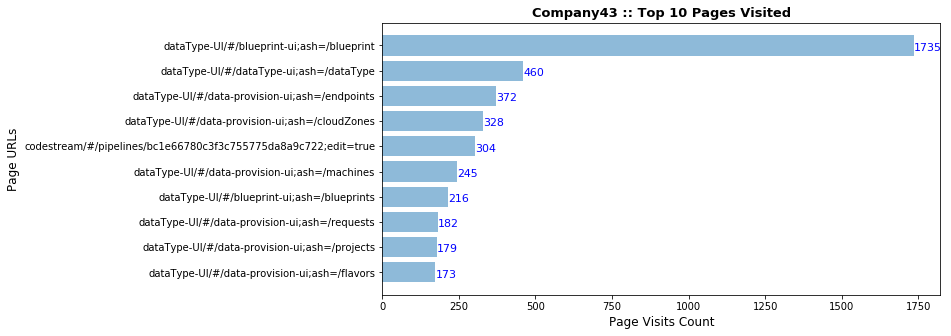

<Figure size 432x288 with 0 Axes>

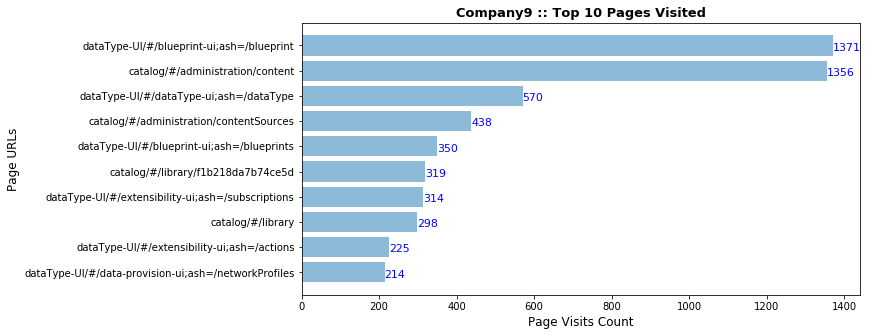

<Figure size 432x288 with 0 Axes>

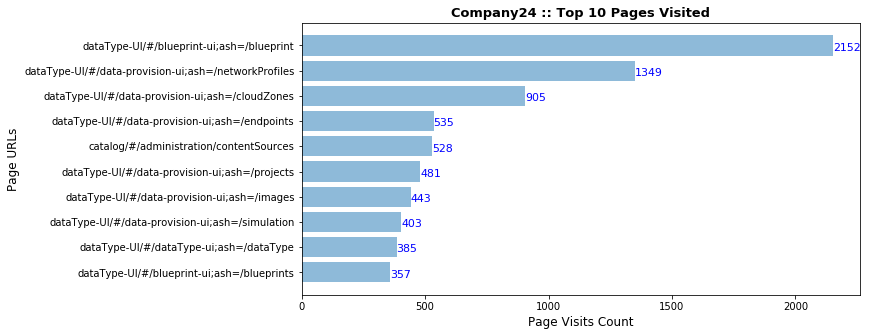

In [49]:
# Plot
counter = 0
for comp_df in comp_dfs:
   comp_df =  comp_df.sort_values(by='PageCount')

   plot_top10_urls(comp_df)

   counter += 1